# 1. Introduction to Conda OpenSim


## 1.1. Objectives

**Introduction to OpenSim**

[OpenSim](https://opensim.stanford.edu/) is an open-source software that allows users to develop, analyze, and visualize models of the musculoskeletal system, and to generate dynamic simulations of movement [[1]](https://doi.org/10.1109/TBME.2007.901024). OpenSim enables users to create custom studies, including investigating the effects of musculoskeletal geometry, joint kinematics, and muscle-tendon properties on the forces and joint moments that the muscles can produce. With OpenSim, our goal is to provide a framework that allows the biomechanics community to create, share, and extend a library of models and dynamic simulation tools to study and quantify human and animal movement.

**Purpose**

The purpose of this tutorial is to introduce users to the [Conda OpenSim](https://anaconda.org/opensim-org/opensim) package, that allows the use of the library in [Jupyter notebooks](https://jupyter.org/). In this tutorial you will:

*   Learn to set up OpenSim in a Jupyter environment ([Google Colab](https://colab.research.google.com/?hl=en)).
*   Create a simple pendulum in OpenSim.
*   Visualize the position of the pendulum using [matplotlib](https://matplotlib.org/).

**Format**

This tutorial guides you through the setup of Conda OpenSim in Google Colab. Then, to test if OpenSim Colab installed correctly, you will create a simple pendulum, simulate it, and visualize its position. As you complete each section of the tutorial, feel free to explore Conda Opensim and modify the code blocks of the tutorial on your own.

## 1.2. Set up Conda and OpenSim

In the following cell, you will use [condacolab](https://github.com/conda-incubator/condacolab) to install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). If you want to install a different conda distribution (e.g., Anaconda, Mambaforge) check [condacolab's documentation](https://github.com/conda-incubator/condacolab#usage).

Don't worry if after executing the previous cell you get an error saying that your session has failed. The reason for this is that condacolab needs to restart the session for the changes to take effect. Because of this, you have to execute the previous cell first, before executing any other cell.

Now, execute the following cell to install the OpenSim conda package using conda.

## 1.3. Using OpenSim to create a pendulum

In order to test OpenSim, you are going to create a simple pendulum. The `ModelFactory` class allows you to create a single-linked pendulum. Then, after initializing the system, you will create a `Manager` to integrate the equations of motion of the pendulum and obtain its table of states. Finally, we obtain the calculated positions and plot them against time using the `matplotlib` package.

The following cell imports the OpenSim module and, if successful, shows the current version and build date (**should be 4.4**).

In [8]:
import opensim as osim
osim.GetVersionAndDate() 

'version 4.4-2022-07-23-0e9fedc, build date 05:12:37 Jul 24 2022'

Now, let's create a simple pendulum and calculate its position over time.

In [9]:
# Simulation parameters (feel free to change this)
starting_time =  0.0
ending_time = 10.0

# Create the pendulum.
pendulum = osim.ModelFactory_createPendulum()


In [10]:
pendulum.setUseVisualizer(True)

The following image shows the structure of the pendulum. It consists of a body attached to the ground through a pin joint.

215195548-9c713166-5cac-4ac4-9a7a-728ce74ff074.svg

In order to simulate this pendulum, you need to initialize the system. You do this using the `initSystem()` function, which returns an initial state for the physical system (the pendulum).

In [11]:
# Initialize the system and set the initial time to to 'starting_time'.
state = pendulum.initSystem()
state.setTime(starting_time)

A manager is necessary to initialize the pendulum to the state we defined in the previous cell. It takes care of simulate the pendulum, and returns the results of this simulation. In the following cell, you will create a manager that initialices the pendulum with the desired state and then performs the simulation.

In [12]:
# Create a new Manager and initialize it using the state from above.
manager = osim.Manager(pendulum)
manager.initialize(state)

# Integrate the model until the ending time defined by 'ending_time' and get 
# a table containing the states of the simulation.
state = manager.integrate(ending_time)
statesTable = manager.getStatesTable()

Once the simulation has finished, you can extract the times and positions from the table of states that you obtained as a result of the simulation.

In [13]:
# Extract time values for the x-axis.
times = statesTable.getIndependentColumn()

# Extract positions of the pendulum over time.
positions = statesTable.getDependentColumn('/jointset/j0/q0/value')

# Print number of positions
print("Number of positions calculted for the interval [", starting_time, ",", ending_time, "]:", positions.size())

Number of positions calculted for the interval [ 0.0 , 100.0 ]: 362


The data from the simulation can now be plotted using, for example, `matplotlib`. The following cell plots the position of the pendulum over time.

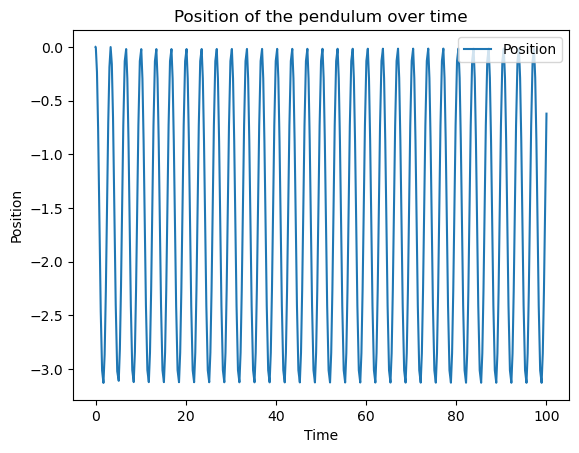

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plot time against swinging pendulum's position.
plt.title("Position of the pendulum over time")
plt.plot(times, positions.to_numpy())
plt.legend(['Position'], loc='best')
plt.xlabel("Time")
plt.ylabel("Position");

## 1.4. Conclusion

In this tutorial you used [condacolab](https://github.com/conda-incubator/condacolab) to install [Miniconda](https://docs.conda.io/en/latest/miniconda.html) in [Google Colab](https://colab.research.google.com/?hl=en). Then, you  installed Conda [OpenSim](https://opensim.stanford.edu/) in the Miniconda environment, and you tested it by creating and simulating a simple pendulum and simulating. Finally, you plotted the positions of the pendulum using [matplotlib](https://matplotlib.org/).

## 1.5. Useful Links





> **OpenSim Website:** https://opensim.stanford.edu/
>
> **OpenSim API Documentation:** https://simtk.org/api_docs/opensim/api_docs/
> 
> **OpenSim Creator Website:** https://opensimcreator.com/
> 
> **SimTK Website:** https://simtk.org/projects/opensim
> 
> **Biomechanics of Movement Course Videos:** https://www.youtube.com/channel/UCDNGy0KKNLQ-ztcL5h2Z6zA

##1.6 Acknowledgments

Thanks to [OpenSimColab](https://simtk.org/projects/opencolab) project [[2]](https://doi.org/10.1080/10255842.2022.2104607) for creating the first OpenSim Conda package.

## 1.7. References




> [1] Delp, S. L., Anderson, F. C., Arnold, A. S., Loan, P., Habib, A., John, C. T., Guendelman, E., & Thelen, D. G. (2007). **OpenSim: open-source software to create and analyze dynamic simulations of movement.** *IEEE Transactions on Bio-Medical Engineering*, 54(11), 1940–1950. https://doi.org/10.1109/TBME.2007.901024
>
> [2] Mokhtarzadeh, H., Jiang, F., Zhao, S., & Malekipour, F. (2022). **OpenColab project: OpenSim in Google colaboratory to explore biomechanics on the web.** *Computer Methods in Biomechanics and Biomedical Engineering*, 1–9. https://doi.org/10.1080/10255842.2022.2104607